In [2]:
import matplotlib.pyplot as plt
import pandas as pd 
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np
import statsmodels.formula.api as sm 
import statistics as stat
from scipy import stats
import seaborn as sns
import math

In [3]:
# set the DPI value (a larger DPI value makes a larger figure)
# for example: setting to 100 to make the IPYNB/HTML file easier to read
# for example: setting to 600 to produce higher-quality figures
FIGURE_SIZE_LEVEL = 1
plt.rcParams['figure.dpi'] = FIGURE_SIZE_LEVEL * 100

plt.rcParams['figure.autolayout'] = True

plt.rcParams['font.size'] = 16        # font size for text
plt.rcParams['axes.titlesize'] = 16   # font size for titles
plt.rcParams['axes.labelsize'] = 16   # font size for x and y labels
plt.rcParams['xtick.labelsize'] = 16  # font size for x tick labels
plt.rcParams['ytick.labelsize'] = 16  # font size for y tick labels

In [11]:
df = pd.read_csv("./movie data/dataset/movie_summary.csv")
df_weekly = pd.read_csv("./movie data/dataset/weekly_boxoffice.csv")

### Category and Revenue 

#### Box plot by category

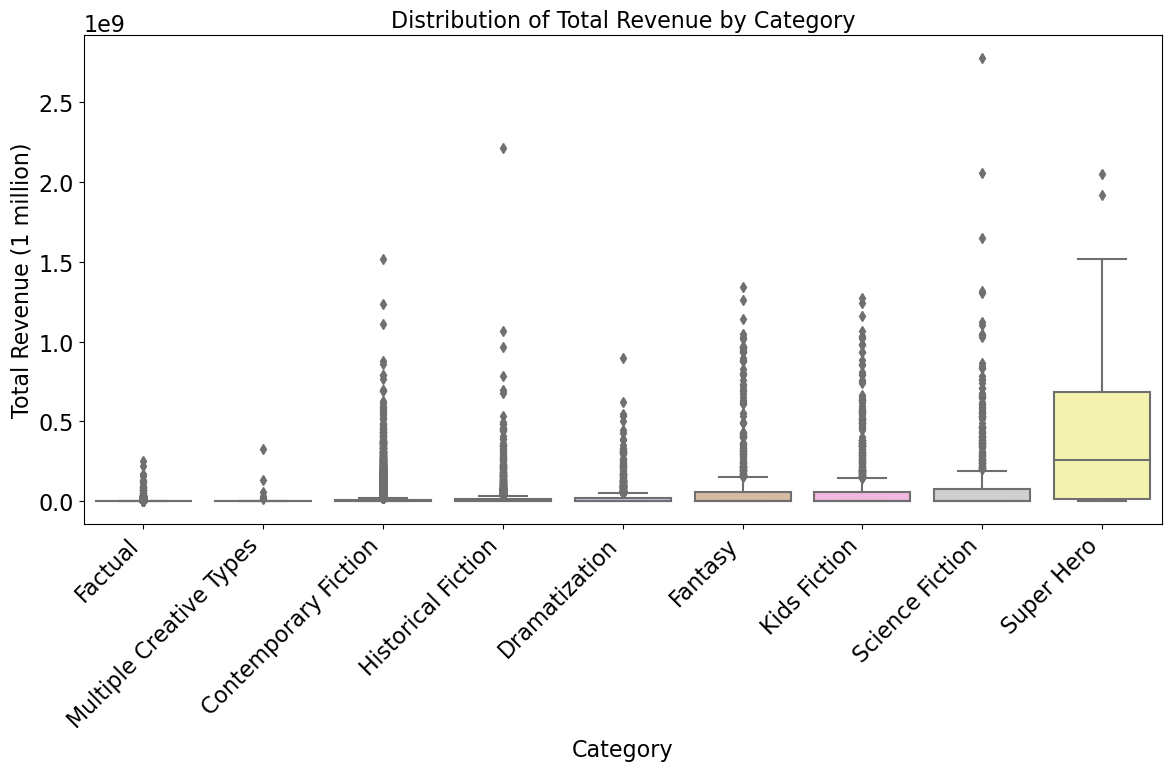

                           count          mean           std     min  \
creative_type                                                          
Contemporary Fiction     10259.0  1.945761e+07  6.125230e+07     0.0   
Dramatization             1062.0  2.797663e+07  7.130668e+07     0.0   
Factual                   2981.0  1.711662e+06  1.080077e+07     0.0   
Fantasy                    934.0  7.487363e+07  1.804001e+08     0.0   
Historical Fiction        1634.0  2.754292e+07  9.471710e+07     0.0   
Kids Fiction               885.0  8.211520e+07  1.844854e+08     0.0   
Multiple Creative Types     46.0  1.364848e+07  5.168899e+07  2772.0   
Science Fiction            760.0  9.733314e+07  2.302871e+08     0.0   
Super Hero                 112.0  4.091860e+08  4.385055e+08     0.0   

                                 25%          50%           75%           max  
creative_type                                                                  
Contemporary Fiction        32981.50     607170

In [15]:
df['total_box_office'] = df['domestic_box_office'] + df['international_box_office']

# Box plot of total revenue by category
plt.figure(figsize=(12, 8))
sns.boxplot(x='creative_type', y='total_box_office', data=df, palette='pastel', order=df.groupby('creative_type')['total_box_office'].mean().sort_values().index)
plt.title('Distribution of Total Revenue by Category')
plt.xlabel('Category')
plt.ylabel('Total Revenue (1 million)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Show descriptive statistics for total revenue by category
desc_stats = df.groupby('creative_type')['total_box_office'].describe()
print(desc_stats)

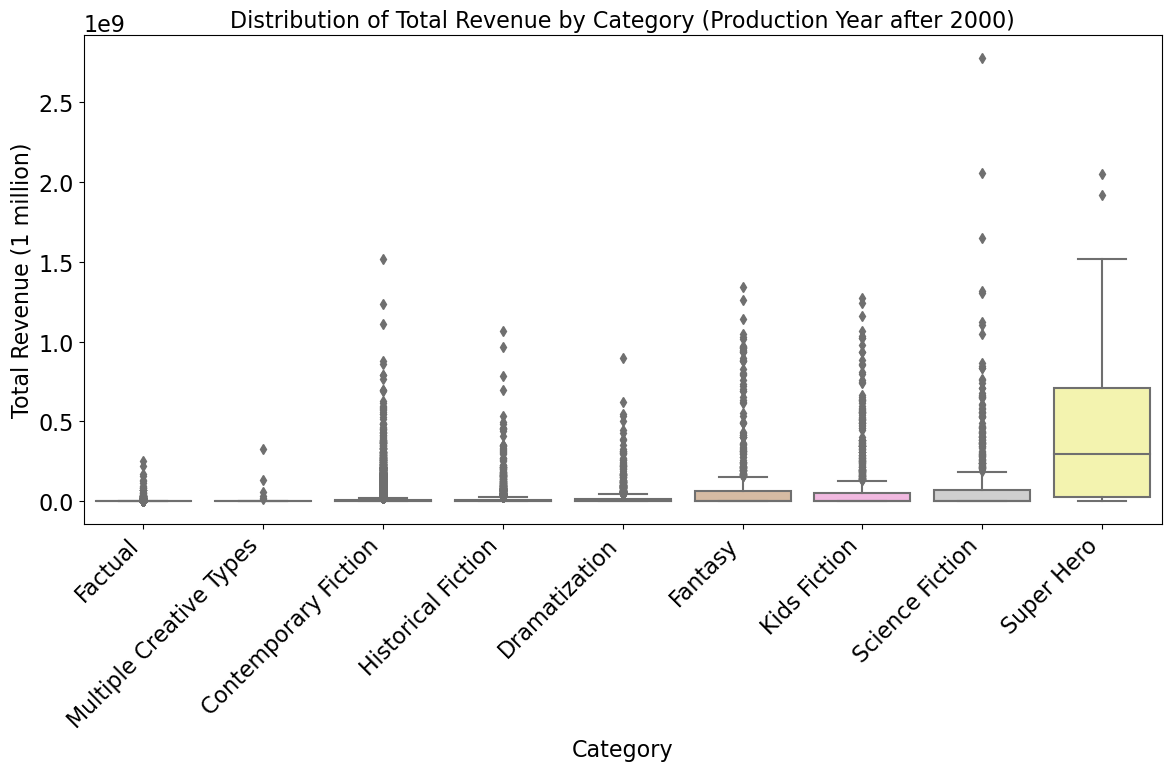

                          count          mean           std     min  \
creative_type                                                         
Contemporary Fiction     9565.0  1.840769e+07  6.013137e+07     0.0   
Dramatization             982.0  2.704829e+07  7.101126e+07     0.0   
Factual                  2908.0  1.602789e+06  1.048478e+07     0.0   
Fantasy                   857.0  7.544305e+07  1.840039e+08     0.0   
Historical Fiction       1453.0  2.428721e+07  7.450994e+07     0.0   
Kids Fiction              841.0  8.050621e+07  1.832622e+08     0.0   
Multiple Creative Types    46.0  1.364848e+07  5.168899e+07  2772.0   
Science Fiction           672.0  9.365631e+07  2.308485e+08     0.0   
Super Hero                107.0  4.245245e+08  4.423094e+08     0.0   

                                 25%          50%           75%           max  
creative_type                                                                  
Contemporary Fiction        31100.00     536012.0  7.48238

In [14]:
# Filter data for movies produced in or after 2000
df_2000 = df[df['production_year'] >= 2000].copy()

# Make sure total_box_office column exists
df_2000['total_box_office'] = df_2000['domestic_box_office'] + df_2000['international_box_office']

# Box plot of total revenue by category (for movies >= 2000)
plt.figure(figsize=(12, 8))
sns.boxplot(
    x='creative_type',
    y='total_box_office',
    data=df_2000,
    palette='pastel',
    order=df_2000.groupby('creative_type')['total_box_office'].mean().sort_values().index
)
plt.title('Distribution of Total Revenue by Category (Production Year after 2000)')
plt.xlabel('Category')
plt.ylabel('Total Revenue (1 million)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Show descriptive statistics for total revenue by category (for movies >= 2000)
desc_stats = df_2000.groupby('creative_type')['total_box_office'].describe()
print(desc_stats)

#### bar chart of box offices by category

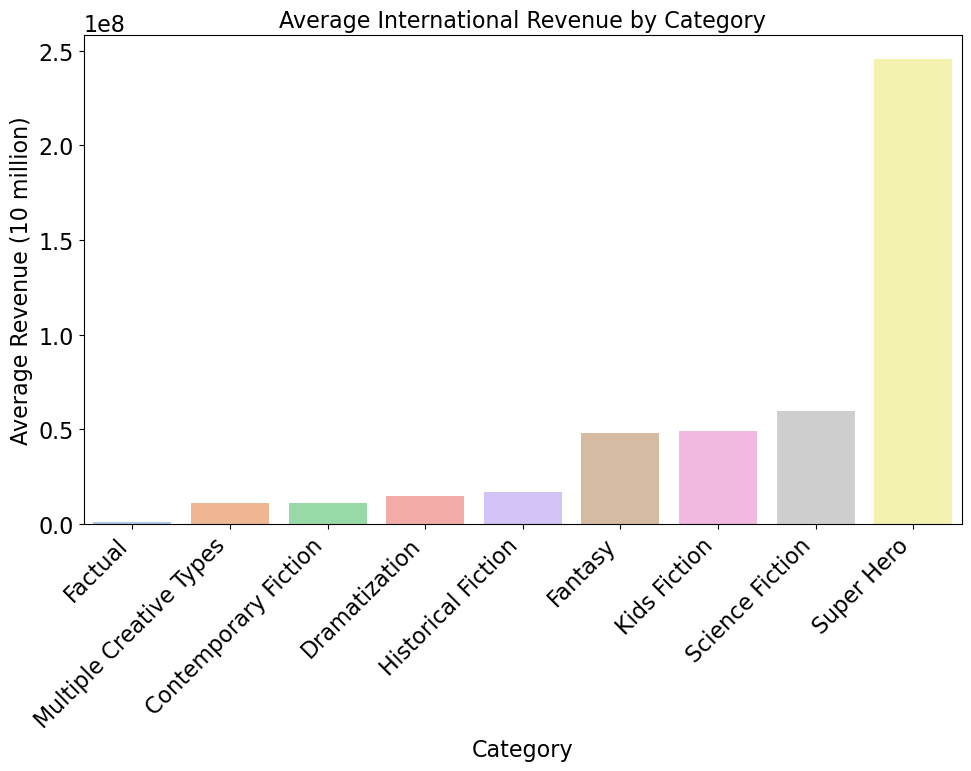

In [13]:
revenue_by_category = df.groupby('creative_type')['international_box_office'].mean().reset_index()
revenue_by_category = revenue_by_category.sort_values('international_box_office')

plt.figure(figsize=(10, 8))
sns.barplot(x='creative_type', y='international_box_office', data=revenue_by_category, palette='pastel')
plt.title('Average International Revenue by Category')
plt.xlabel('Category')
plt.ylabel('Average Revenue (10 million)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels
plt.tight_layout()
plt.show()

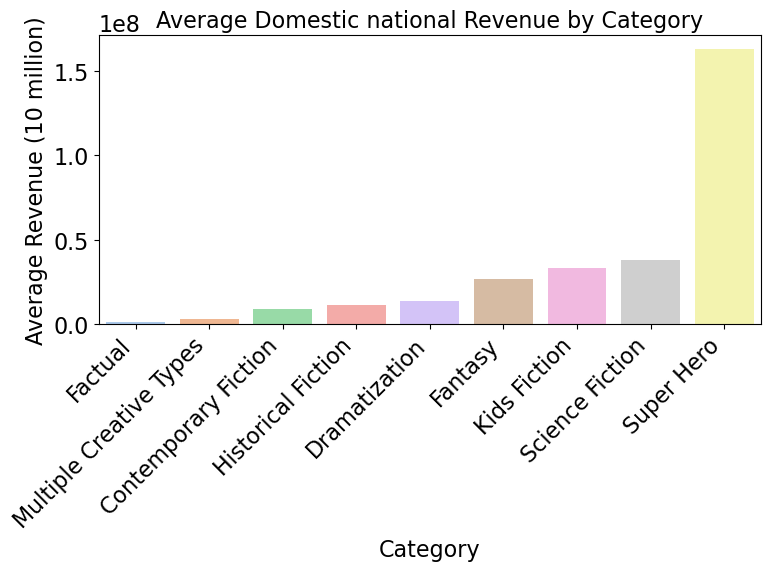

In [7]:
revenue_by_category = df.groupby('creative_type')['domestic_box_office'].mean().reset_index()
revenue_by_category = revenue_by_category.sort_values('domestic_box_office')

plt.figure(figsize=(8, 6))
sns.barplot(x='creative_type', y='domestic_box_office', data=revenue_by_category, palette='pastel')
plt.title('Average Domestic national Revenue by Category')
plt.xlabel('Category')
plt.ylabel('Average Revenue (10 million)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels
plt.tight_layout()
plt.show()

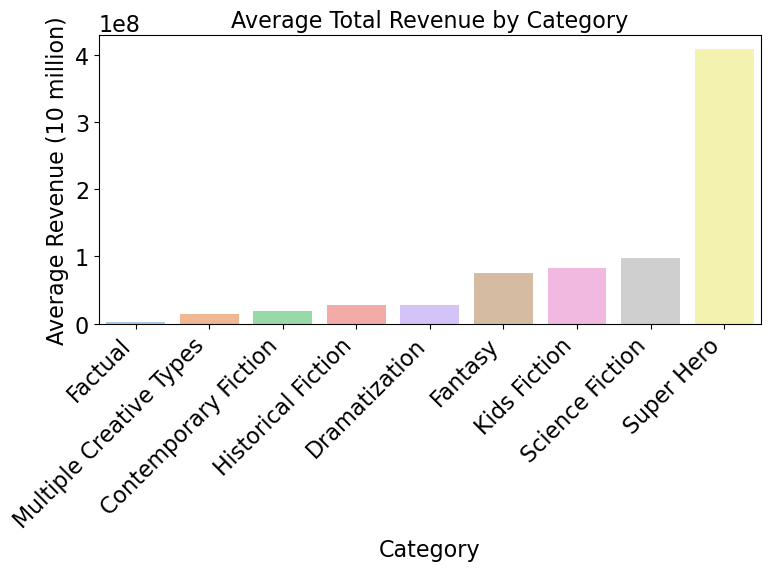

In [8]:
df['total_box_office'] = df['domestic_box_office'] + df['international_box_office']
revenue_by_category = df.groupby('creative_type')['total_box_office'].mean().reset_index()
revenue_by_category = revenue_by_category.sort_values('total_box_office')

plt.figure(figsize=(8, 6))
sns.barplot(x='creative_type', y='total_box_office', data=revenue_by_category, palette='pastel')
plt.title('Average Total Revenue by Category')
plt.xlabel('Category')
plt.ylabel('Average Revenue (10 million)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels
plt.tight_layout()
plt.show()

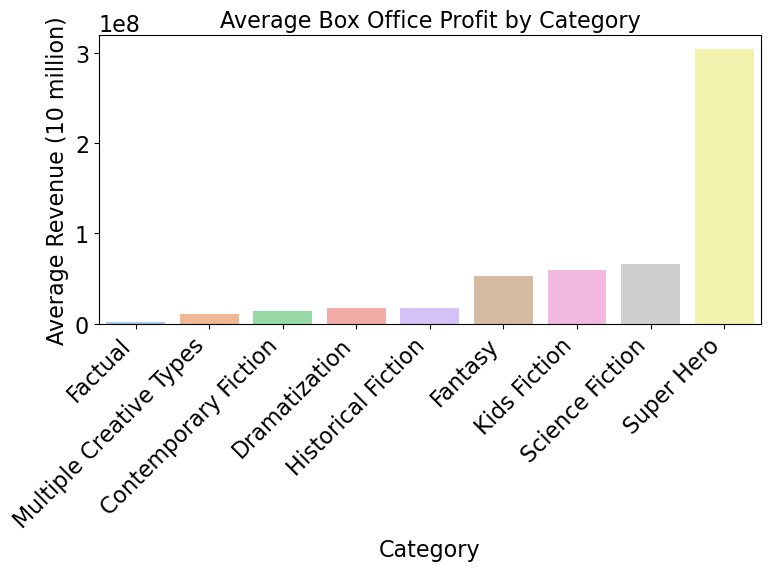

In [9]:
df['box_office_profit'] = df['domestic_box_office'] + df['international_box_office'] - df['production_budget']
revenue_by_category = df.groupby('creative_type')['box_office_profit'].mean().reset_index()
revenue_by_category = revenue_by_category.sort_values('box_office_profit')

plt.figure(figsize=(8, 6))
sns.barplot(x='creative_type', y='box_office_profit', data=revenue_by_category, palette='pastel')
plt.title('Average Box Office Profit by Category')
plt.xlabel('Category')
plt.ylabel('Average Revenue (10 million)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels
plt.tight_layout()
plt.show()

#### Ratio of Domesic and International Box Office

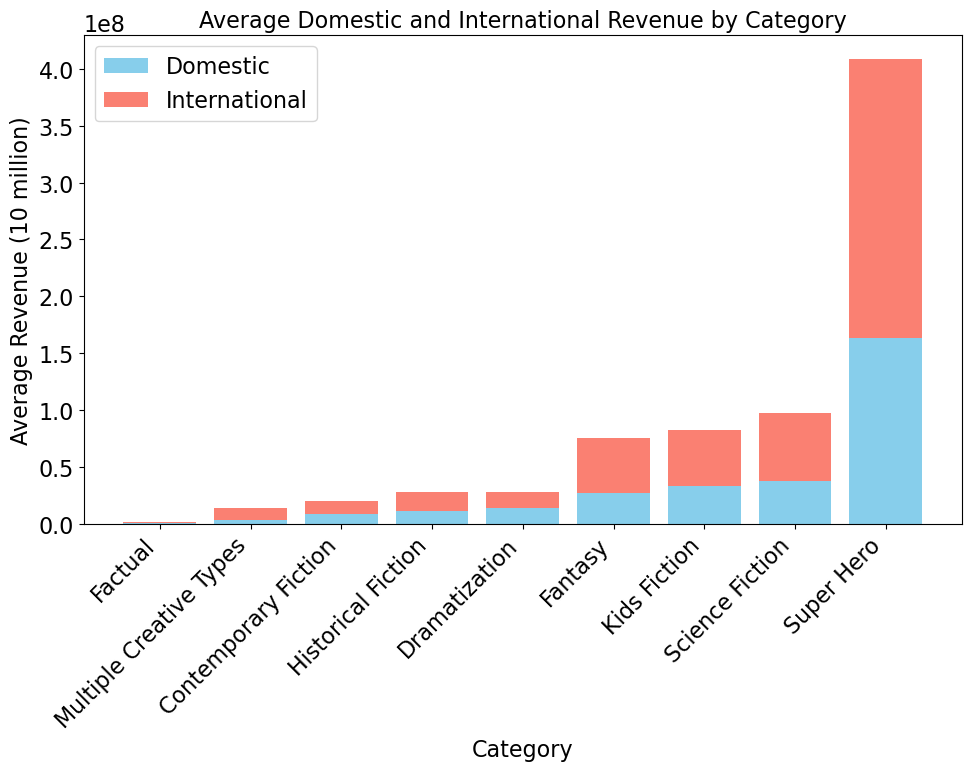

             creative_type  intl_to_dom_ratio
2                  Factual           0.827473
6  Multiple Creative Types           3.918627
0     Contemporary Fiction           1.283778
4       Historical Fiction           1.546847
1            Dramatization           1.071064
3                  Fantasy           1.799334
5             Kids Fiction           1.487146
7          Science Fiction           1.588120
8               Super Hero           1.506346


In [10]:
# Group by category and calculate mean for both domestic and international box office
revenue_by_category = df.groupby('creative_type')[['domestic_box_office', 'international_box_office']].mean().reset_index()

# Calculate the international-to-domestic ratio
revenue_by_category['intl_to_dom_ratio'] = revenue_by_category['international_box_office'] / revenue_by_category['domestic_box_office']

# Sort by total box office
revenue_by_category['total'] = revenue_by_category['domestic_box_office'] + revenue_by_category['international_box_office']
revenue_by_category = revenue_by_category.sort_values('total')

# Plot stacked bar
plt.figure(figsize=(10, 8))
plt.bar(revenue_by_category['creative_type'], revenue_by_category['domestic_box_office'], label='Domestic', color='skyblue')
plt.bar(revenue_by_category['creative_type'], revenue_by_category['international_box_office'],
        bottom=revenue_by_category['domestic_box_office'], label='International', color='salmon')

plt.title('Average Domestic and International Revenue by Category')
plt.xlabel('Category')
plt.ylabel('Average Revenue (10 million)')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

# Show the international-to-domestic ratio
print(revenue_by_category[['creative_type', 'intl_to_dom_ratio']])

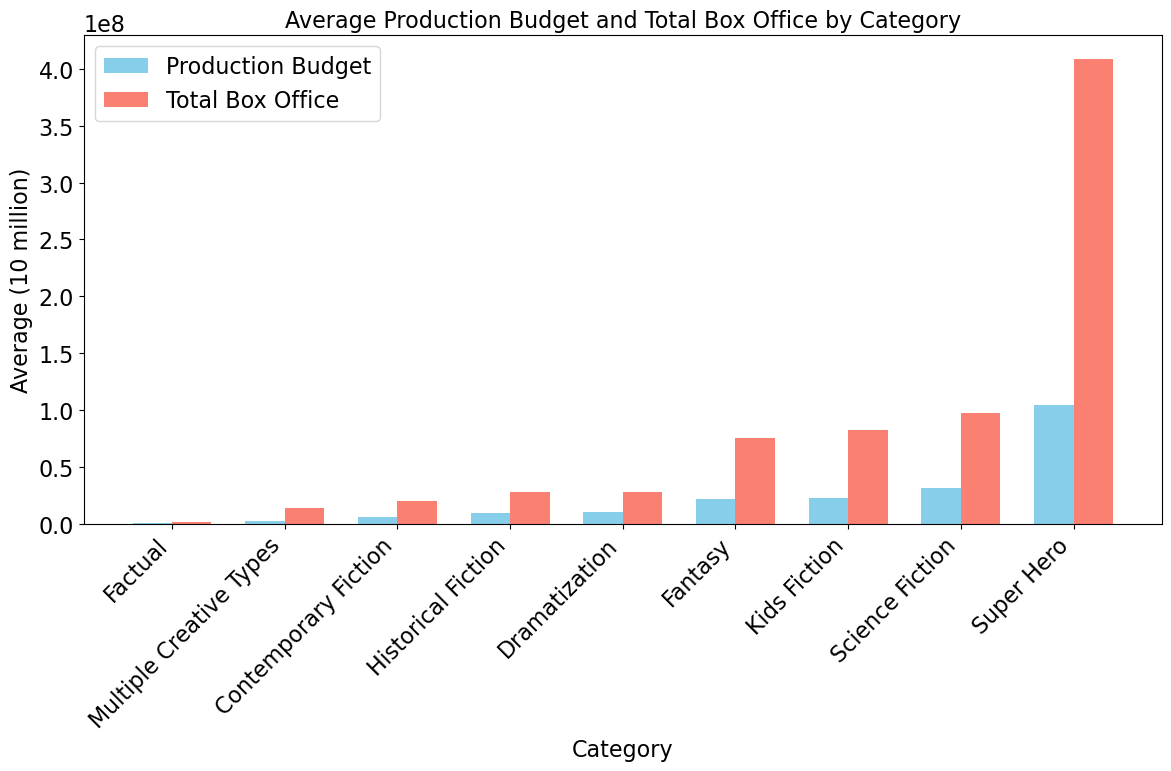

In [11]:
# Calculate average total_box_office and production_budget by category
avg_by_category = df.groupby('creative_type')[['total_box_office', 'production_budget']].mean().reset_index()
avg_by_category = avg_by_category.sort_values('total_box_office')

# Set position for each bar
x = np.arange(len(avg_by_category['creative_type']))
width = 0.35  # width of the bars

plt.figure(figsize=(12, 8))
plt.bar(x - width/2, avg_by_category['production_budget'], width, label='Production Budget', color='skyblue')
plt.bar(x + width/2, avg_by_category['total_box_office'], width, label='Total Box Office', color='salmon')

plt.xticks(x, avg_by_category['creative_type'], rotation=45, ha='right')
plt.xlabel('Category')
plt.ylabel('Average (10 million)')
plt.title('Average Production Budget and Total Box Office by Category')
plt.legend()
plt.tight_layout()
plt.show()

### Source

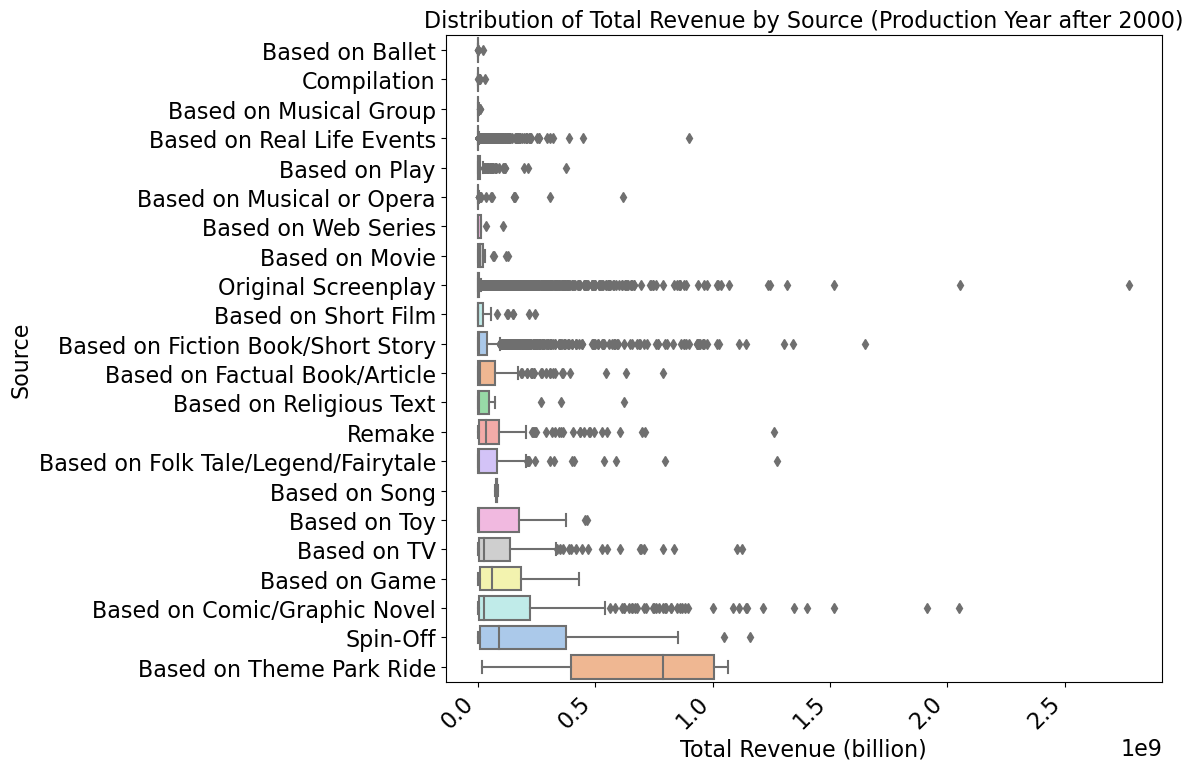

                          count          mean           std     min  \
creative_type                                                         
Contemporary Fiction     9565.0  1.840769e+07  6.013137e+07     0.0   
Dramatization             982.0  2.704829e+07  7.101126e+07     0.0   
Factual                  2908.0  1.602789e+06  1.048478e+07     0.0   
Fantasy                   857.0  7.544305e+07  1.840039e+08     0.0   
Historical Fiction       1453.0  2.428721e+07  7.450994e+07     0.0   
Kids Fiction              841.0  8.050621e+07  1.832622e+08     0.0   
Multiple Creative Types    46.0  1.364848e+07  5.168899e+07  2772.0   
Science Fiction           672.0  9.365631e+07  2.308485e+08     0.0   
Super Hero                107.0  4.245245e+08  4.423094e+08     0.0   

                                 25%          50%           75%           max  
creative_type                                                                  
Contemporary Fiction        31100.00     536012.0  7.48238

In [12]:
# Filter data for movies produced in or after 2000
df_2000 = df[df['production_year'] >= 2000].copy()

df_2000['total_box_office'] = df_2000['domestic_box_office'] + df_2000['international_box_office']

# Box plot of total revenue by category (for movies >= 2000)
plt.figure(figsize=(12, 8))
sns.boxplot(
    x='total_box_office',
    y='source',
    data=df_2000,
    palette='pastel',
    order=df_2000.groupby('source')['total_box_office'].mean().sort_values().index,
    orient='h'
)
plt.title('Distribution of Total Revenue by Source (Production Year after 2000)')
plt.ylabel('Source')
plt.xlabel('Total Revenue (billion)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Show descriptive statistics for total revenue by category (for movies >= 2000)
desc_stats = df_2000.groupby('creative_type')['total_box_office'].describe()
print(desc_stats)

### Distributer

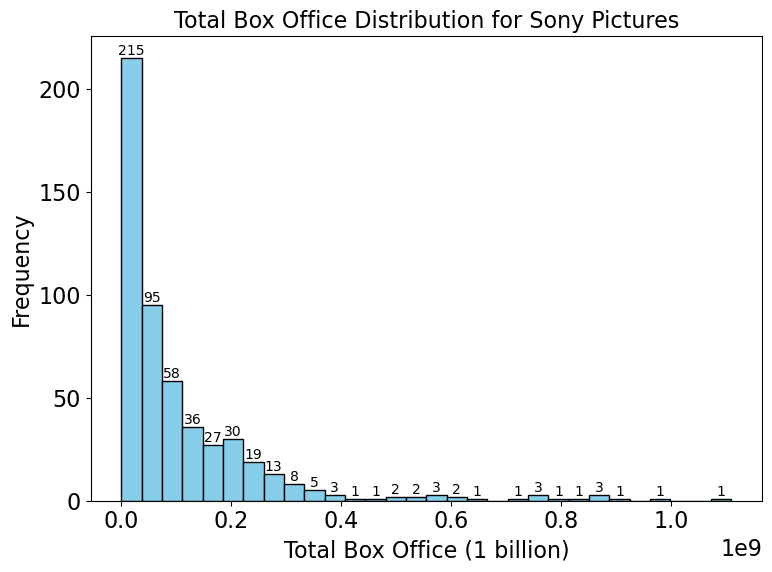

In [13]:
def revenue_distribution_by_distributor(distributor_name):
    # Filter the DataFrame for the specific distributor
    df_dist = df[df['distributor'] == distributor_name]

    # Plot histogram and get the counts and bin edges
    plt.figure(figsize=(8, 6))
    counts, bins, patches = plt.hist(df_dist['total_box_office'], bins=30, color='skyblue', edgecolor='black')

    # Annotate each bar with its count
    for count, bin_left, bin_right in zip(counts, bins[:-1], bins[1:]):
        if count > 0:
            plt.text((bin_left + bin_right) / 2, count, int(count), ha='center', va='bottom', fontsize=10)

    plt.title(f'Total Box Office Distribution for {distributor_name}')
    plt.xlabel('Total Box Office (1 billion)')
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

revenue_distribution_by_distributor('Sony Pictures')

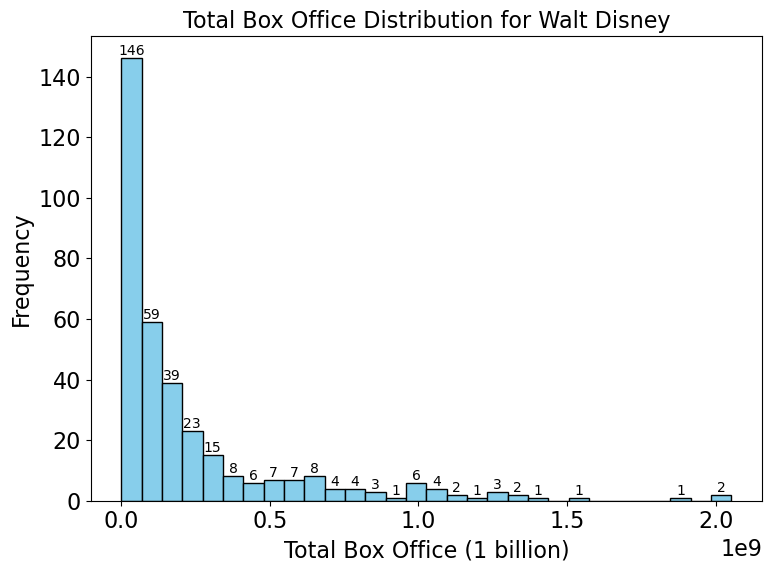

In [14]:
revenue_distribution_by_distributor('Walt Disney')

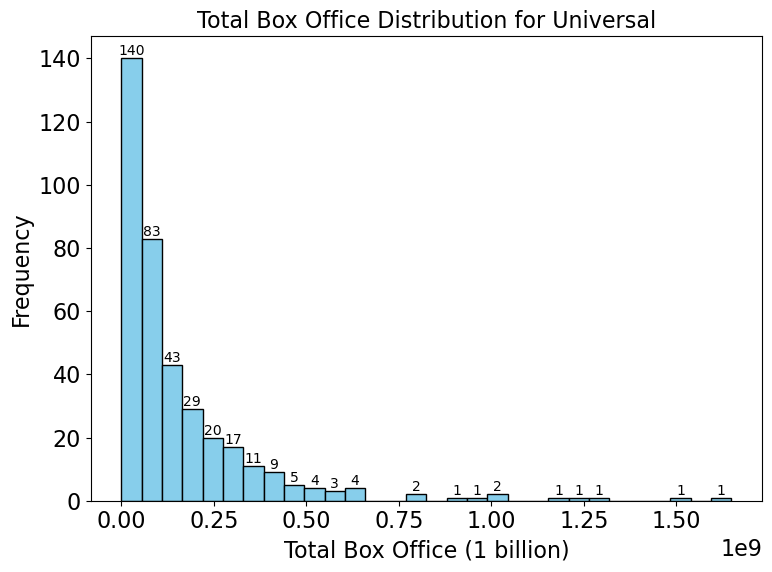

In [15]:
revenue_distribution_by_distributor('Universal')

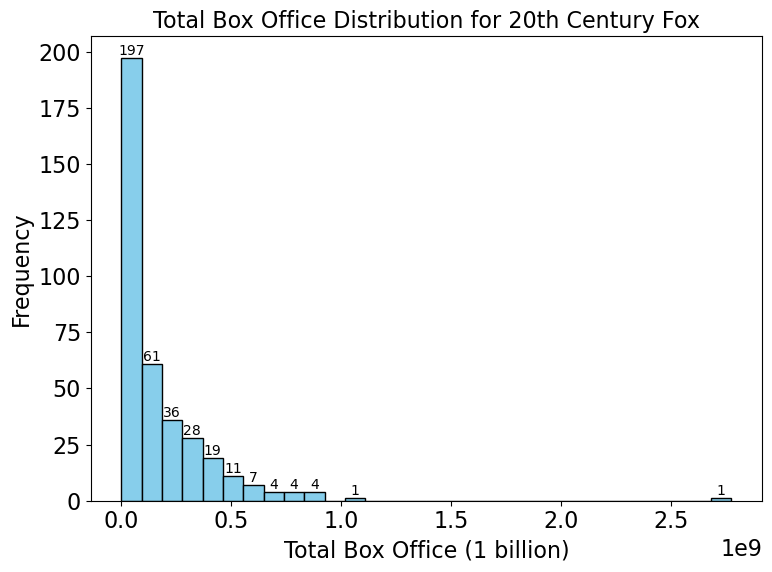

In [16]:
revenue_distribution_by_distributor('20th Century Fox')

#### Distribution and Category

In [17]:
categories = df['creative_type'].unique()

for cat in categories:
    df_cat = df[df['creative_type'] == cat]
    # Top 5 by number of movies
    top_count = df_cat['distributor'].value_counts().head(5)
    # Top 5 by average revenue
    top_avg_revenue = df_cat.groupby('distributor')['total_box_office'].mean().sort_values(ascending=False).head(5)
    
    print(f"\nCategory: {cat}")
    print("Top 5 Distributors by Number of Movies:")
    print(top_count.to_string())
    print("Top 5 Distributors by Average Revenue:")
    print(top_avg_revenue.to_string())


Category: Historical Fiction
Top 5 Distributors by Number of Movies:
Sony Pictures Classics    50
Miramax                   49
Warner Bros.              48
Sony Pictures             46
IFC Films                 40
Top 5 Distributors by Average Revenue:
distributor
Great India Films     2.635029e+08
Paramount Pictures    2.233632e+08
Vestron               2.138938e+08
Dreamworks SKG        2.091434e+08
Walt Disney           1.645797e+08

Category: Super Hero
Top 5 Distributors by Number of Movies:
Walt Disney           19
20th Century Fox      18
Warner Bros.          17
Sony Pictures         13
Paramount Pictures     6
Top 5 Distributors by Average Revenue:
distributor
Walt Disney           9.653166e+08
Sony Pictures         5.601951e+08
Warner Bros.          5.187434e+08
Paramount Pictures    4.594262e+08
20th Century Fox      3.929653e+08

Category: Science Fiction
Top 5 Distributors by Number of Movies:
20th Century Fox      50
Sony Pictures         50
Warner Bros.          47
Univ

### Top 10 Revenue

In [18]:
from tabulate import tabulate

top10 = df.sort_values('total_box_office', ascending=False).head(20).copy()
top10.insert(0, 'Rank', range(1, len(top10) + 1))

print(tabulate(
    top10[['Rank', 'display_name', 'production_year', 'total_box_office', 'distributor']],
    headers='keys',
    tablefmt='plain',
    showindex=False,
    stralign='left',
    numalign='left'
))

Rank    display_name                                   production_year    total_box_office    distributor
1       Avatar                                         2009               2776345279          20th Century Fox
2       Titanic                                        1997               2208208395          Paramount Pictures
3       Star Wars Ep. VII: The Force Awakens           2015               2053311220          Walt Disney
4       Avengers: Infinity War                         2017               2048134200          Walt Disney
5       Avengers: Endgame                              2018               1914531638          Walt Disney
6       Jurassic World                                 2014               1648854864          Universal
7       Furious 7                                      2014               1518722794          Universal
8       The Avengers                                   2011               1517935897          Walt Disney
9       Avengers: Age of Ultron       

### Theater

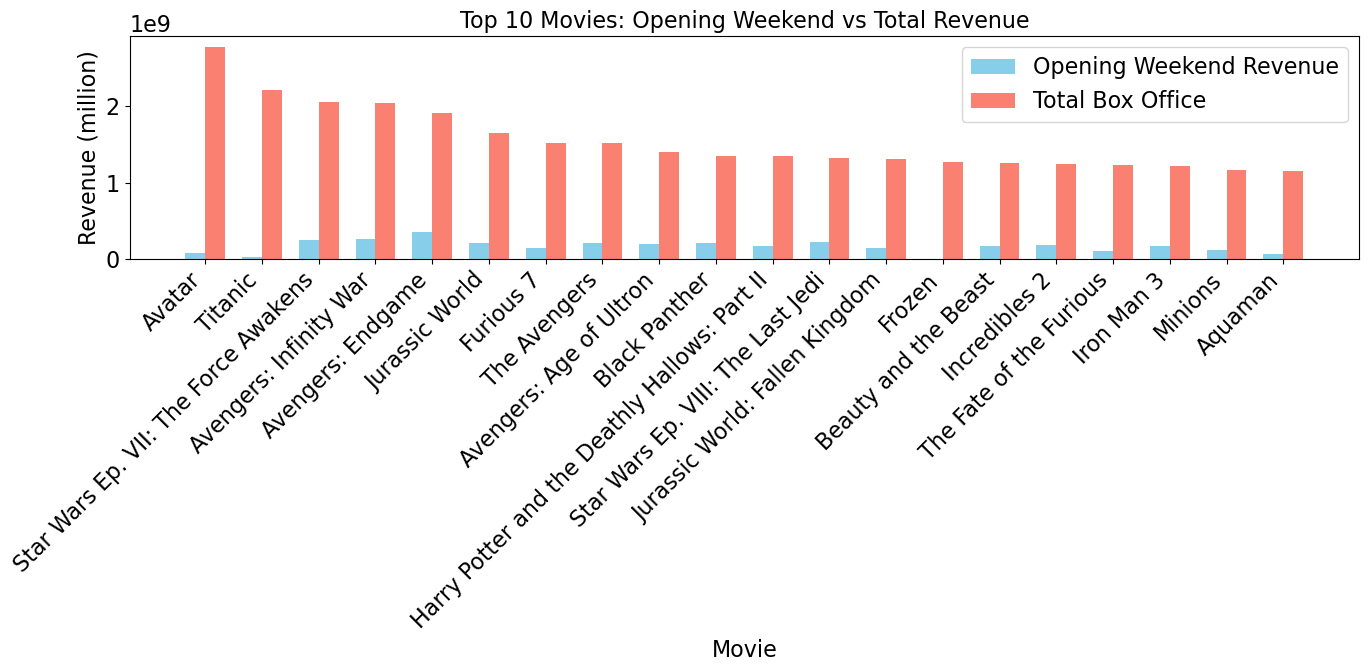

In [19]:
top10_opening_revenue = top10[['display_name', 'opening_weekend_revenue', 'total_box_office']]

# Set position for each bar
x = np.arange(len(top10_opening_revenue['display_name']))
width = 0.35

plt.figure(figsize=(14, 7))
plt.bar(x - width/2, top10_opening_revenue['opening_weekend_revenue'], width, label='Opening Weekend Revenue', color='skyblue')
plt.bar(x + width/2, top10_opening_revenue['total_box_office'], width, label='Total Box Office', color='salmon')

plt.xticks(x, top10_opening_revenue['display_name'], rotation=45, ha='right')
plt.xlabel('Movie')
plt.ylabel('Revenue (million)')
plt.title('Top 10 Movies: Opening Weekend vs Total Revenue')
plt.legend()
plt.tight_layout()
plt.show()

### Sequel

In [20]:
sequel = df['sequel'].value_counts().reset_index()
sequel.columns = ['Sequel', 'Count']
# show the counts of sequels
print(sequel)


   Sequel  Count
0     0.0  18058
1     1.0    928


In [16]:
# Find top 20 sequels by total box office
top20_sequels = df[df['sequel'] == 1].sort_values('total_box_office', ascending=False).head(20).copy()
top20_sequels.insert(0, 'Rank', range(1, len(top20_sequels) + 1))

# Show rank, name, and total box office
print(top20_sequels[['movie_odid', 'Rank', 'display_name', 'total_box_office']])

       movie_odid  Rank                                   display_name  \
8959    183740100     1           Star Wars Ep. VII: The Force Awakens   
9896    202830100     2                         Avengers: Infinity War   
10626   217970100     3                              Avengers: Endgame   
6520    118060100     4                                 Jurassic World   
9311    190820100     5                                      Furious 7   
8780    179490100     6                        Avengers: Age of Ultron   
6272    105420100     7  Harry Potter and the Deathly Hallows: Part II   
10879   223080100     8              Star Wars Ep. VIII: The Last Jedi   
11533   237380100     9                 Jurassic World: Fallen Kingdom   
11034   226520100    10                                  Incredibles 2   
11176   229550100    11                        The Fate of the Furious   
7575    146800100    12                                     Iron Man 3   
10         110100    13  The Lord of t

In [18]:
# Find all movies with "Star Wars" in the display_name and sort by production_year
star_wars_movies = df[df['display_name'].str.contains('Star Wars', case=False, na=False)]
star_wars_movies = star_wars_movies.sort_values('production_year')
print(star_wars_movies[['movie_odid', 'display_name', 'production_year', 'total_box_office']])

       movie_odid                              display_name  production_year  \
2           30100              Star Wars Ep. IV: A New Hope             1977   
34         360100  Star Wars Ep. V: The Empire Strikes Back             1980   
27         280100      Star Wars Ep. VI: Return of the Jedi             1983   
5           60100       Star Wars Ep. I: The Phantom Menace             1999   
25         260100    Star Wars Ep. II: Attack of the Clones             2002   
9          100100    Star Wars Ep. III: Revenge of the Sith             2005   
975      16150100                 Star Wars: The Clone Wars             2008   
8959    183740100      Star Wars Ep. VII: The Force Awakens             2015   
10202   209040100              Rogue One: A Star Wars Story             2016   
10879   223080100         Star Wars Ep. VIII: The Last Jedi             2017   
11487   236430100                   Solo: A Star Wars Story             2017   

       total_box_office  
2            

In [ ]:
odid_list = star_wars_movies['movie_odid'].tolist()

# Filter df_weekly for these movies and days_in_release == 7
first_week_revenue = df_weekly[(df_weekly['movie_odid'].isin(odid_list)) & (df_weekly['days_in_release'] == 7)]

# Show movie_odid and revenue for the first week
print(first_week_revenue[['movie_odid','display_name', 'revenue']])

        movie_odid                          display_name      revenue
17737     16150100             Star Wars: The Clone Wars   19337598.0
92788    183740100  Star Wars Ep. VII: The Force Awakens  390856054.0
100648   209040100          Rogue One: A Star Wars Story  221999674.0
104825   223080100     Star Wars Ep. VIII: The Last Jedi  296602356.0
107698   236430100               Solo: A Star Wars Story  119592692.0


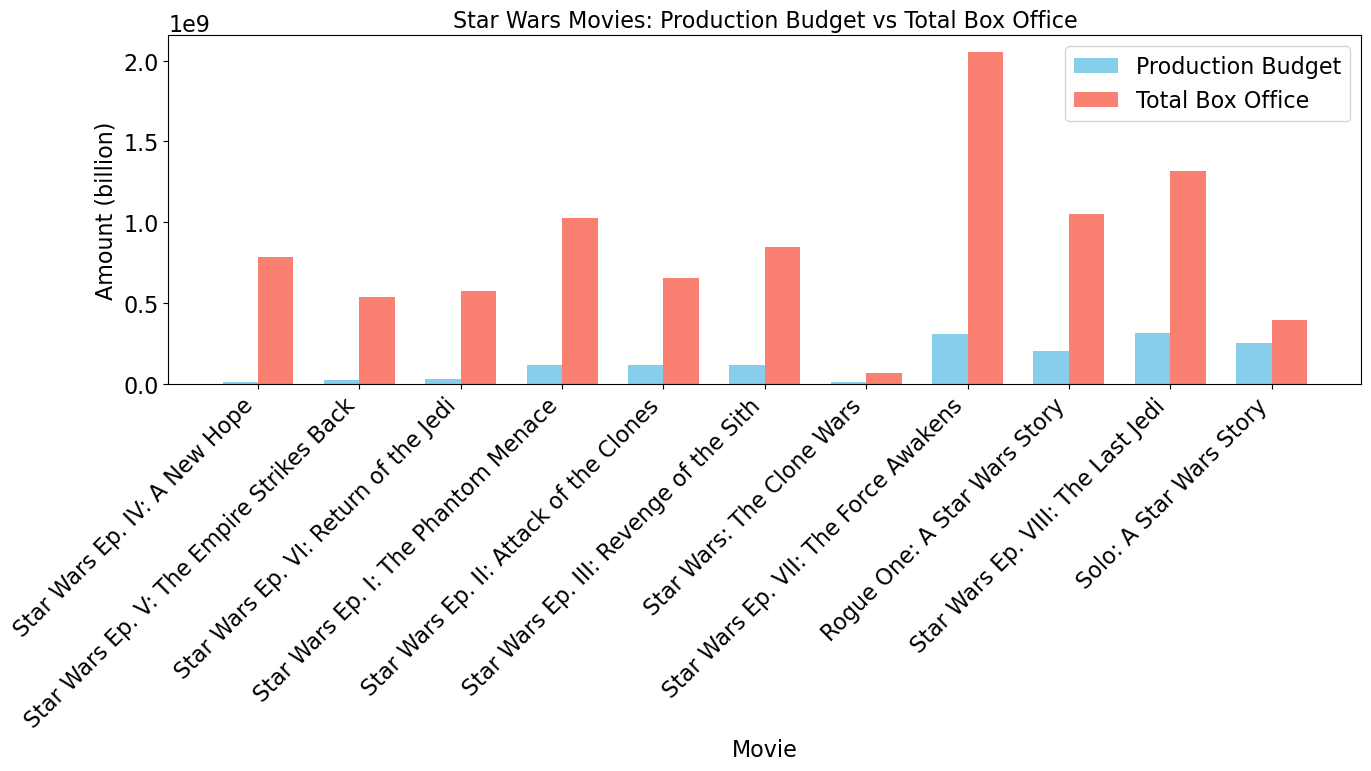

In [27]:
# Plot bar chart of total box office and production budget for Star Wars movies
x = np.arange(len(star_wars_movies))
width = 0.35

plt.figure(figsize=(14, 8))
plt.bar(x - width/2, star_wars_movies['production_budget'], width, label='Production Budget', color='skyblue')
plt.bar(x + width/2, star_wars_movies['total_box_office'], width, label='Total Box Office', color='salmon')

plt.xticks(x, star_wars_movies['display_name'], rotation=45, ha='right')
plt.xlabel('Movie')
plt.ylabel('Amount (billion)')
plt.title('Star Wars Movies: Production Budget vs Total Box Office')
plt.legend()
plt.tight_layout()
plt.show()

In [103]:
# Find Avengers movies produced after 2000 and sort by production_year
avengers_movies = df[
    (df['display_name'].str.contains('Avengers', case=False, na=False)) &
    (df['production_year'] > 2000)
].sort_values('production_year').copy()
print(avengers_movies[['movie_odid', 'display_name', 'production_year', 'total_box_office']])

       movie_odid             display_name  production_year  total_box_office
6519    117960100             The Avengers             2011        1517935897
8780    179490100  Avengers: Age of Ultron             2014        1403013963
9896    202830100   Avengers: Infinity War             2017        2048134200
10626   217970100        Avengers: Endgame             2018        1914531638


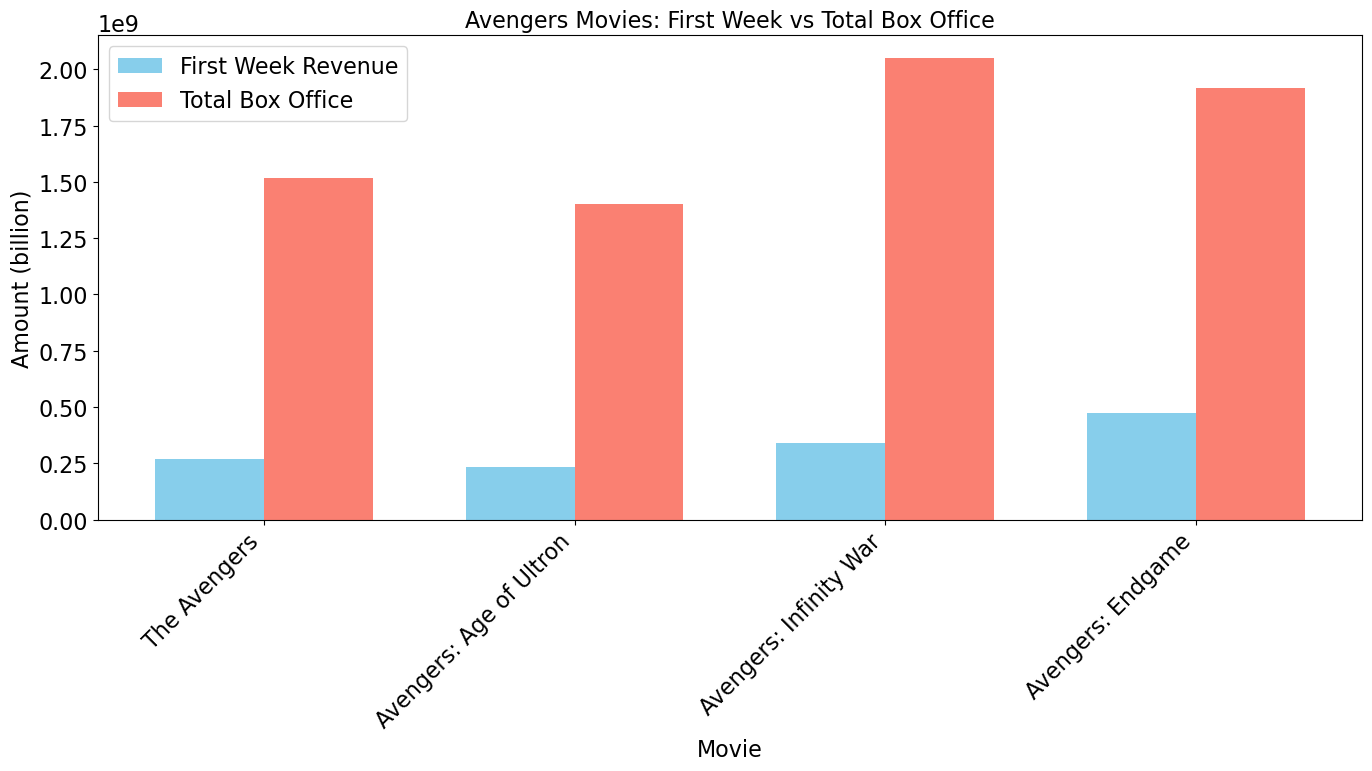

   movie_odid             display_name  production_budget  \
0   117960100             The Avengers          225000000   
1   179490100  Avengers: Age of Ultron          330600000   
2   202830100   Avengers: Infinity War          300000000   
3   217970100        Avengers: Endgame          356000000   

   first_weekly_revenue  total_box_office  first_weekly_ratio  
0           270019373.0        1517935897            0.177886  
1           235655468.0        1403013963            0.167964  
2           338332540.0        2048134200            0.165191  
3           473894638.0        1914531638            0.247525  


In [112]:
x = np.arange(len(avengers_movies))
width = 0.35

# !from wikipidia! add the production budget of "Avengers: Endgame" manually
avengers_movies.loc[avengers_movies['display_name'] == 'Avengers: Endgame', 'production_budget'] = 356000000  # in million

# Get the movie_odid list from top20_sequels
odid_list = avengers_movies['movie_odid'].tolist()
# Filter df_weekly for these movies and days_in_release == 7
first_week_revenue = df_weekly[(df_weekly['movie_odid'].isin(odid_list)) & (df_weekly['days_in_release'] == 7)]

# Merge
avengers_movies = avengers_movies.merge(
    first_week_revenue[['movie_odid', 'revenue']],
    on='movie_odid',
    how='left'
).rename(columns={'revenue': 'first_weekly_revenue'})

# # Drop all but the first occurrence of 'first_weekly_revenue'
# cols = avengers_movies.columns
# dupes = [col for col in cols if col.startswith('first_weekly_revenue')]
# if len(dupes) > 1:
#     avengers_movies = avengers_movies.drop(columns=dupes[1:])
# print(avengers_movies[['movie_odid', 'display_name', 'production_budget', 'first_weekly_revenue', 'total_box_office']])

plt.figure(figsize=(14, 8))
plt.bar(x - width/2, avengers_movies['first_weekly_revenue'].values, width, label='First Week Revenue', color='skyblue')
plt.bar(x + width/2, avengers_movies['total_box_office'].values, width, label='Total Box Office', color='salmon')

plt.xticks(x, avengers_movies['display_name'], rotation=45, ha='right')
plt.xlabel('Movie')
plt.ylabel('Amount (billion)')
plt.title('Avengers Movies: First Week vs Total Box Office')
plt.legend()
plt.tight_layout()
plt.show()

# calculate ratio of first weekly revenue to total box office
avengers_movies['first_weekly_ratio'] = avengers_movies['first_weekly_revenue'] / avengers_movies['total_box_office']
print(avengers_movies[['movie_odid', 'display_name', 'production_budget', 'first_weekly_revenue', 'total_box_office', 'first_weekly_ratio']])

In [39]:
# Find all movies with "Star Wars" in the display_name and sort by production_year
jurassic_movies = df[df['display_name'].str.contains('Jurassic World', case=False, na=False)]
jurassic_movies = jurassic_movies.sort_values('production_year')
print(jurassic_movies[['movie_odid', 'display_name', 'production_year', 'total_box_office']])

       movie_odid                               display_name  production_year  \
6520    118060100                             Jurassic World             2014   
14265   280060100  Lego Jurassic World: The Indominus Escape             2016   
11533   237380100             Jurassic World: Fallen Kingdom             2017   

       total_box_office  
6520         1648854864  
14265                 0  
11533        1305772799  


In [40]:
# Get the movie_odid list from top20_sequels
odid_list = jurassic_movies['movie_odid'].tolist()

# Filter df_weekly for these movies and days_in_release == 7
first_week_revenue = df_weekly[(df_weekly['movie_odid'].isin(odid_list)) & (df_weekly['days_in_release'] == 7)]

# Show movie_odid and revenue for the first week
print(first_week_revenue[['movie_odid','display_name', 'revenue']])

# calculate ratio of first weekly revenue to total box office
jurassic_movies = jurassic_movies.merge(
    first_week_revenue[['movie_odid', 'revenue']],
    on='movie_odid',
    how='left'
).rename(columns={'revenue': 'first_weekly_revenue'})

jurassic_movies['first_weekly_ratio'] = jurassic_movies['first_weekly_revenue'] / jurassic_movies['total_box_office']
print(jurassic_movies[['movie_odid', 'display_name', 'production_budget', 'first_weekly_revenue', 'total_box_office', 'first_weekly_ratio']])

        movie_odid                    display_name      revenue
70987    118060100                  Jurassic World  296211655.0
107893   237380100  Jurassic World: Fallen Kingdom  204787335.0
   movie_odid                               display_name  production_budget  \
0   118060100                             Jurassic World          215000000   
1   280060100  Lego Jurassic World: The Indominus Escape                  0   
2   237380100             Jurassic World: Fallen Kingdom          170000000   

   first_weekly_revenue  total_box_office  first_weekly_ratio  
0           296211655.0        1648854864            0.179647  
1                   NaN                 0                 NaN  
2           204787335.0        1305772799            0.156832  


In [76]:
# Find Avengers movies produced after 2000 and sort by production_year
furious_movies = df[
    (df['display_name'].str.contains('Furious', case=False, na=False)) &
    (df['production_year'] > 2000)
].sort_values('production_year').copy()
print(furious_movies[['movie_odid', 'display_name', 'production_year', 'production_budget', 'total_box_office']])

       movie_odid                           display_name  production_year  \
162       2000100               The Fast and the Furious             2001   
6703    129840100                       2 Fast 2 Furious             2003   
557       8290100  The Fast and the Furious: Tokyo Drift             2006   
143       1720100                         Fast & Furious             2009   
8161    163420100                     Fast and Furious 6             2012   
9311    190820100                              Furious 7             2014   
11176   229550100                The Fate of the Furious             2016   

       production_budget  total_box_office  
162             38000000         206512310  
6703            76000000         236410607  
557             85000000         157794205  
143             85000000         363064265  
8161           160000000         789300444  
9311           190000000        1518722794  
11176          250000000        1234846267  


                            display_name  production_budget  \
0               The Fast and the Furious           38000000   
1                       2 Fast 2 Furious           76000000   
2  The Fast and the Furious: Tokyo Drift           85000000   
3                         Fast & Furious           85000000   
4                     Fast and Furious 6          160000000   
5                              Furious 7          190000000   
6                The Fate of the Furious          250000000   

   first_weekly_revenue  total_box_office  
0            57815070.0         206512310  
1            64905330.0         236410607  
2            33342405.0         157794205  
3            89259190.0         363064265  
4           135839525.0         789300444  
5           191930470.0        1518722794  
6           124896220.0        1234846267  


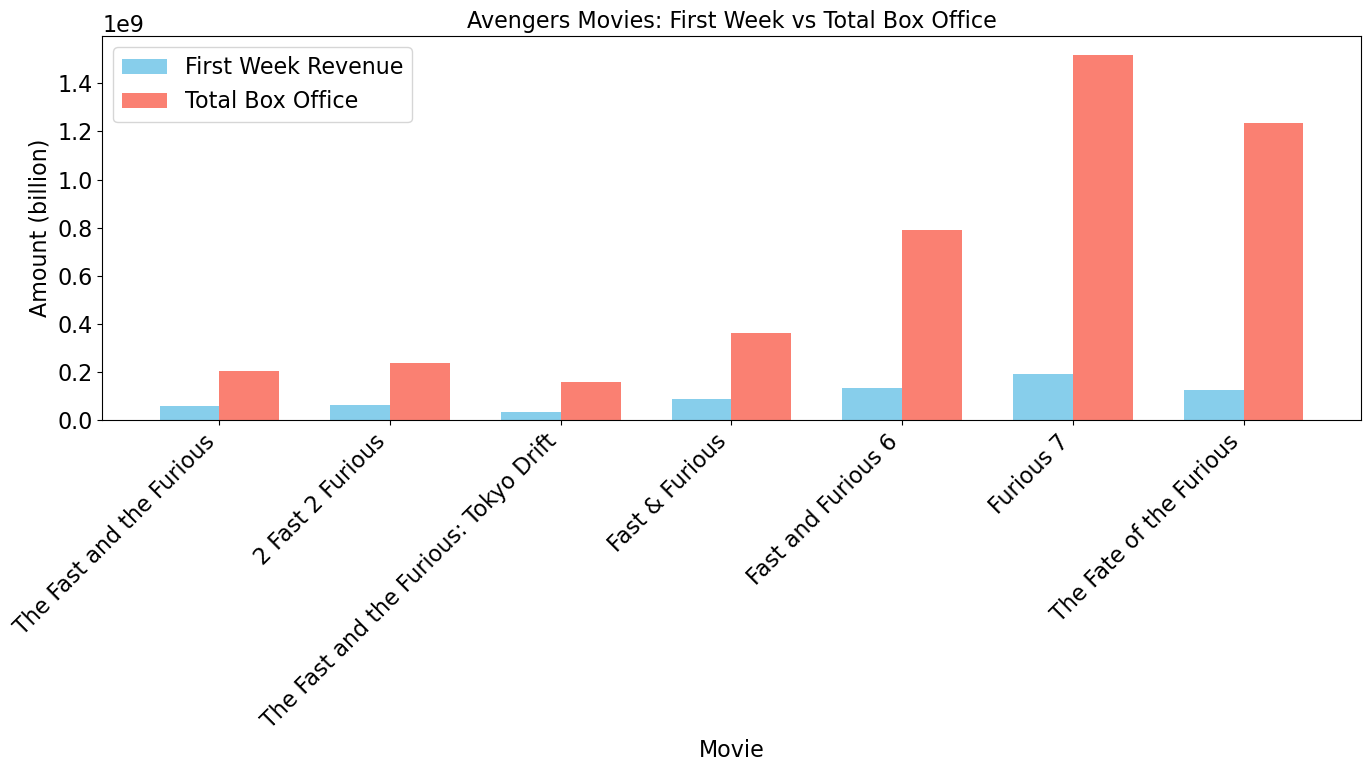

   movie_odid                           display_name  production_budget  \
0     2000100               The Fast and the Furious           38000000   
1   129840100                       2 Fast 2 Furious           76000000   
2     8290100  The Fast and the Furious: Tokyo Drift           85000000   
3     1720100                         Fast & Furious           85000000   
4   163420100                     Fast and Furious 6          160000000   
5   190820100                              Furious 7          190000000   
6   229550100                The Fate of the Furious          250000000   

   first_weekly_revenue  total_box_office  first_weekly_ratio  
0            57815070.0         206512310            0.279959  
1            64905330.0         236410607            0.274545  
2            33342405.0         157794205            0.211303  
3            89259190.0         363064265            0.245850  
4           135839525.0         789300444            0.172101  
5           191

In [ ]:
odid_list = furious_movies['movie_odid'].tolist()

# Filter df_weekly for these movies and days_in_release == 7
first_week_revenue = df_weekly[(df_weekly['movie_odid'].isin(odid_list)) & (df_weekly['days_in_release'] == 7)].sort_values('chart_date')

# Show movie_odid and revenue, and box_office in movie summary
furious_movies = furious_movies.merge(
    first_week_revenue[['movie_odid', 'revenue']],
    on='movie_odid',
    how='left'
).rename(columns={'revenue': 'first_weekly_revenue'})

#print(furious_movies[['display_name', 'production_budget', 'first_weekly_revenue', 'total_box_office']])

plt.figure(figsize=(14, 8))
plt.bar(x - width/2, furious_movies['first_weekly_revenue'].values, width, label='First Week Revenue', color='skyblue')
plt.bar(x + width/2, furious_movies['total_box_office'].values, width, label='Total Box Office', color='salmon')

plt.xticks(x, furious_movies['display_name'], rotation=45, ha='right')
plt.xlabel('Movie')
plt.ylabel('Amount (billion)')
plt.title('Avengers Movies: First Week vs Total Box Office')
plt.legend()
plt.tight_layout()
plt.show()

# calculate ratio of first weekly revenue to total box office
furious_movies['first_weekly_ratio'] = furious_movies['first_weekly_revenue'] / furious_movies['total_box_office']
print(furious_movies[['movie_odid', 'display_name', 'production_budget', 'first_weekly_revenue', 'total_box_office', 'first_weekly_ratio']])


In [113]:
# Find all movies with "Star Wars" in the display_name and sort by production_year
transformer_movies = df[df['display_name'].str.contains('Transformer', case=False, na=False)]
transformer_movies = transformer_movies.sort_values('production_year')
print(transformer_movies[['movie_odid', 'display_name', 'production_year', 'total_box_office']])

       movie_odid                         display_name  production_year  \
20         210100                         Transformers             2007   
8           90100  Transformers: Revenge of the Fallen             2009   
6328    108970100       Transformers: Dark of the Moon             2011   
8533    173060100      Transformers: Age of Extinction             2013   
13142   263300100        Transformers: The Last Knight             2017   

       total_box_office  
20            708272592  
8             836519699  
6328         1123790543  
8533         1104039076  
13142         602893340  


In [114]:
odid_list = transformer_movies['movie_odid'].tolist()

# Filter df_weekly for these movies and days_in_release == 7
first_week_revenue = df_weekly[(df_weekly['movie_odid'].isin(odid_list)) & (df_weekly['days_in_release'] == 7)]

# Show movie_odid and revenue for the first week
print(first_week_revenue[['movie_odid','display_name', 'revenue']])

       movie_odid                     display_name      revenue
89718   173060100  Transformers: Age of Extinction  138345769.0


其他的daily不是從7開始:3/ 2 / 2/ 2 開始 QQ

In [121]:
# Find all movies with "Star Wars" in the display_name and sort by production_year
toy_story_movies = df[df['display_name'].str.contains('Toy Story', case=False, na=False)]
toy_story_movies = toy_story_movies.sort_values('production_year')
print(toy_story_movies[['movie_odid', 'display_name', 'production_year', 'total_box_office']])

odid_list = toy_story_movies['movie_odid'].tolist()

# Filter df_weekly for these movies and days_in_release == 7
first_week_revenue = df_weekly[(df_weekly['movie_odid'].isin(odid_list)) & (df_weekly['days_in_release'] == 7)]

# manually add the first week revenue for "Toy Story"
# !!! only have data of 9 days, 34579405 / 9 * 7 !!!
first_week_revenue = first_week_revenue.append({
    'movie_odid': '1030100',  # Toy Story's movie_odid
    'display_name': 'Toy Story',
    'revenue': 26895092
}, ignore_index=True)
print(first_week_revenue[['movie_odid','display_name', 'revenue']])


      movie_odid                 display_name  production_year  \
92       1030100                    Toy Story             1995   
50        540100                  Toy Story 2             1999   
6397   111560100  Toy Story 3D Double Feature             2009   
6550   120120100                  Toy Story 3             2010   

      total_box_office  
92           364545516  
50           511358276  
6397          35868069  
6550        1068879522  
  movie_odid                 display_name      revenue
0     540100                  Toy Story 2   23093123.0
1  111560100  Toy Story 3D Double Feature   15002348.0
2  120120100                  Toy Story 3  167551682.0
3    1030100                    Toy Story   26895092.0


C:\Users\Canny\AppData\Local\Temp\ipykernel_24268\3188798517.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  first_week_revenue = first_week_revenue.append({


                            display_name  production_budget  \
0               The Fast and the Furious           38000000   
1                       2 Fast 2 Furious           76000000   
2  The Fast and the Furious: Tokyo Drift           85000000   
3                         Fast & Furious           85000000   
4                     Fast and Furious 6          160000000   
5                              Furious 7          190000000   
6                The Fate of the Furious          250000000   

   first_weekly_revenue  total_box_office  
0            57815070.0         206512310  
1            64905330.0         236410607  
2            33342405.0         157794205  
3            89259190.0         363064265  
4           135839525.0         789300444  
5           191930470.0        1518722794  
6           124896220.0        1234846267  


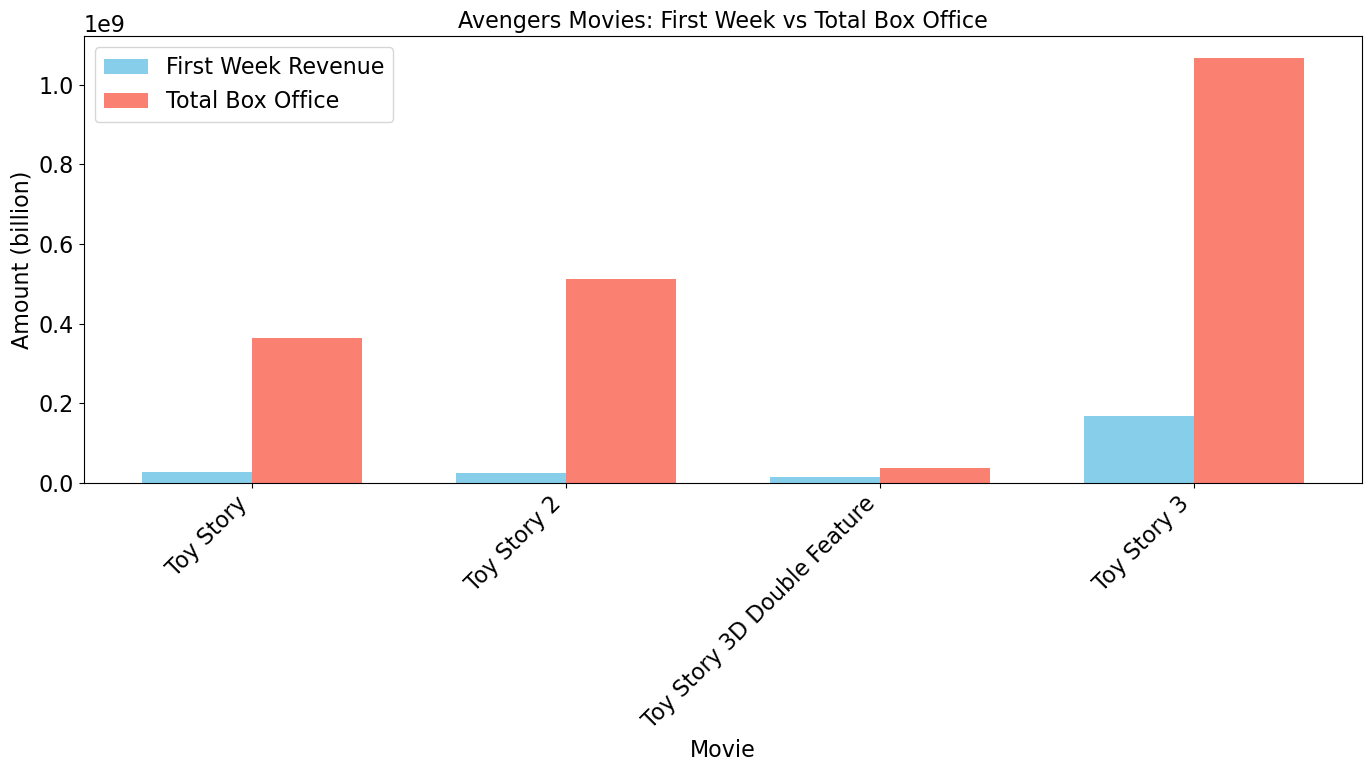

  movie_odid                 display_name  production_budget  \
0    1030100                    Toy Story           30000000   
1     540100                  Toy Story 2           90000000   
2  111560100  Toy Story 3D Double Feature                  0   
3  120120100                  Toy Story 3          200000000   

   first_weekly_revenue  total_box_office  first_weekly_ratio  
0            26895092.0         364545516            0.073777  
1            23093123.0         511358276            0.045160  
2            15002348.0          35868069            0.418265  
3           167551682.0        1068879522            0.156755  


In [125]:
# Show movie_odid and revenue, and box_office in movie summary
toy_story_movies = toy_story_movies.merge(
    first_week_revenue[['display_name', 'revenue']],
    on='display_name',
    how='left'
).rename(columns={'revenue': 'first_weekly_revenue'})

print(furious_movies[['display_name', 'production_budget', 'first_weekly_revenue', 'total_box_office']])

plt.figure(figsize=(14, 8))
plt.bar(x - width/2, toy_story_movies['first_weekly_revenue'].values, width, label='First Week Revenue', color='skyblue')
plt.bar(x + width/2, toy_story_movies['total_box_office'].values, width, label='Total Box Office', color='salmon')

plt.xticks(x, toy_story_movies['display_name'], rotation=45, ha='right')
plt.xlabel('Movie')
plt.ylabel('Amount (billion)')
plt.title('Avengers Movies: First Week vs Total Box Office')
plt.legend()
plt.tight_layout()
plt.show()

# calculate ratio of first weekly revenue to total box office
toy_story_movies['first_weekly_ratio'] = toy_story_movies['first_weekly_revenue'] / toy_story_movies['total_box_office']
print(toy_story_movies[['movie_odid', 'display_name', 'production_budget', 'first_weekly_revenue', 'total_box_office', 'first_weekly_ratio']])